# ---> **LIBRERÍAS** <---

In [88]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import time

import tensorflow as tf
import keras.utils

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall

from sklearn.metrics import classification_report

# ---> **IMPORTAR DATASETS** <---



In [2]:
lotes = 64
semilla = 1337

nombre_dataset = 'cats20_probarV2'

train_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TRAINING'
validation_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/VALIDATION'
test_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TESTING'

In [4]:
def importarDatasets(dimensiones: tuple):

    train_dataset = keras.utils.image_dataset_from_directory(
                train_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    validation_dataset = keras.utils.image_dataset_from_directory(
                validation_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    testing_dataset = keras.utils.image_dataset_from_directory(
            test_directory,
            labels='inferred',
            label_mode='categorical',
            image_size=dimensiones,
            batch_size=lotes,
            seed=semilla
    )
    
    class_names = train_dataset.class_names
    num_classes = len(class_names)

    return train_dataset, validation_dataset, testing_dataset, num_classes

# ---> **MODELO1 InceptionV3** <---

In [5]:
from keras.applications import InceptionV3

dimensionesModelo1 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo1)

dimension_foto = dimensionesModelo1[0]
#--------------------------------
model1 = Sequential()
model1.add(Input(shape=(dimension_foto, dimension_foto, 3)))
inceptionV3 = InceptionV3(weights='imagenet', include_top=False)
inceptionV3.trainable=False
model1.add(inceptionV3)

model1.add(Flatten())
model1.add(Dense(num_classes, activation='softmax'))
#--------------------------------
model1.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model1.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 31)                1587231   
                                                                 
Total params: 23,390,015
Trainable params: 1,587,231
Non-trainable params: 21,802,784
_________________________________________________________________


In [6]:
model1.compile(
  optimizer=Adam(),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy', Precision(), Recall()]
)

inicio = time.time()

history = model1.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=1,
                    shuffle=True,
) 

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/5
171/171 [==============================] - 23s 97ms/step - loss: 246.6038 - accuracy: 0.1486 - precision: 0.1486 - recall: 0.1485 - val_loss: 162.9539 - val_accuracy: 0.1539 - val_precision: 0.1540 - val_recall: 0.1539
Epoch 2/5
171/171 [==============================] - 15s 85ms/step - loss: 118.2246 - accuracy: 0.2685 - precision: 0.2686 - recall: 0.2685 - val_loss: 147.7269 - val_accuracy: 0.1952 - val_precision: 0.1952 - val_recall: 0.1952
Epoch 3/5
171/171 [==============================] - 15s 86ms/step - loss: 102.1974 - accuracy: 0.3482 - precision: 0.3483 - recall: 0.3482 - val_loss: 163.1767 - val_accuracy: 0.2203 - val_precision: 0.2203 - val_recall: 0.2203
Epoch 4/5
171/171 [==============================] - 16s 88ms/step - loss: 95.6423 - accuracy: 0.4054 - precision: 0.4054 - recall: 0.4053 - val_loss: 175.7792 - val_accuracy: 0.2377 - val_precision: 0.2379 - val_recall: 0.2377
Epoch 5/5
171/171 [==============================] - 16s 88ms/step - loss: 77.3211 - 

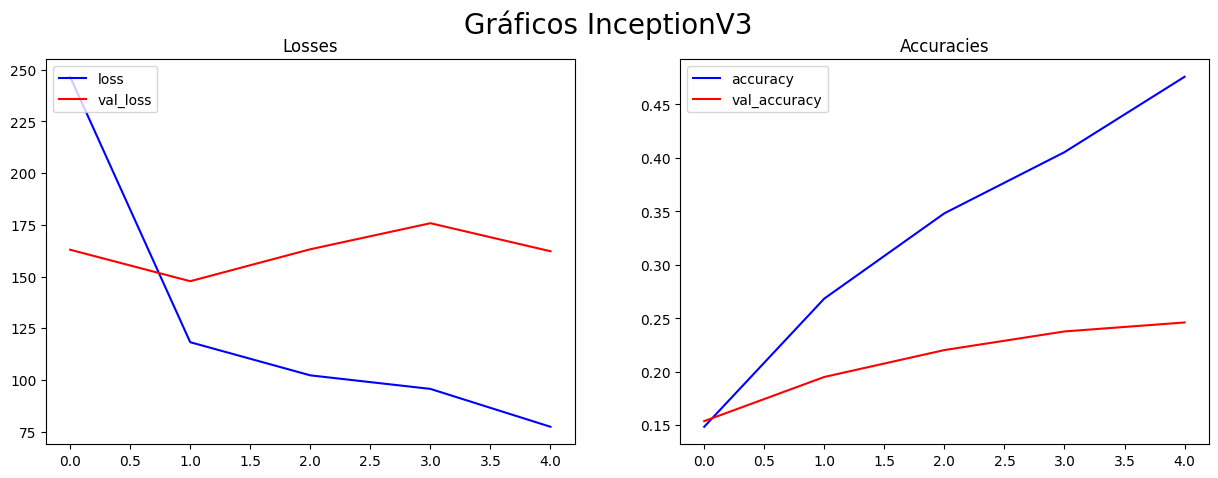

25/25 [==============================] - 2s 66ms/step - loss: 165.6573 - accuracy: 0.2474 - precision: 0.2474 - recall: 0.2474
***** Test loss: 165.6573486328125 *****
***** Test accuracy: 0.24740932881832123 *****
***** Test Precision: 0.24740932881832123 *****
***** Test Recall: 0.24740932881832123 *****


In [9]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos InceptionV3', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model1.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

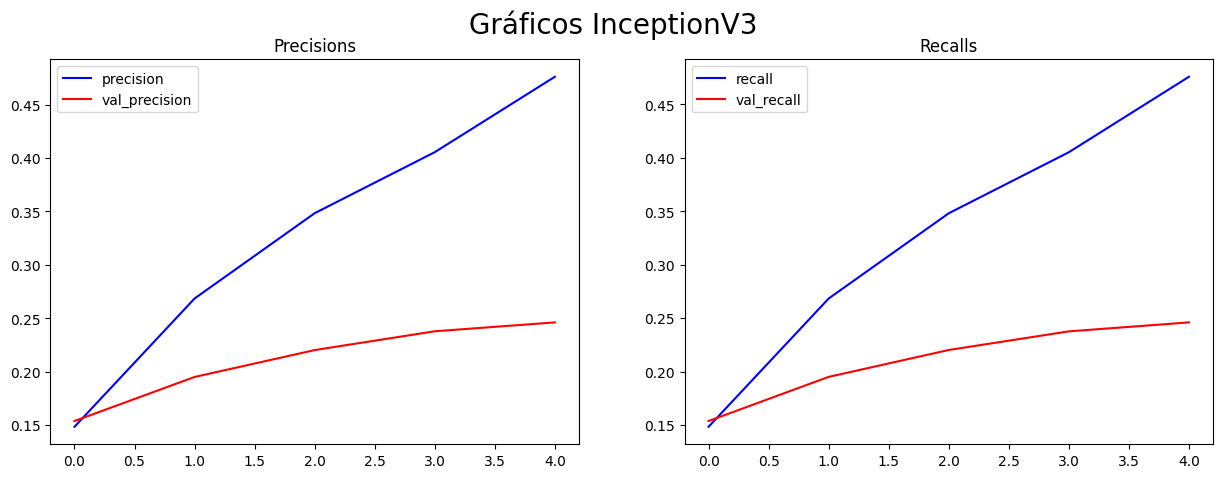

In [11]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision'], color='blue', label='precision')
plt.plot(history.history['val_precision'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall'], color='blue', label='recall')
plt.plot(history.history['val_recall'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos InceptionV3', fontsize=20)
plt.show()

In [49]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    predicciones = model1.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))   

1/1 [==============================] - 0s 20ms/step


In [50]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.3465009079891977,
 'recall': 0.24740932642487046,
 'f1-score': 0.2310517186487442,
 'support': 1544.0}

# ---> **MODELO2 ResNet50V2** <---


In [20]:
from keras.applications import ResNet50V2
 

dimensionesModelo2 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo2)

dimension_foto = dimensionesModelo2[0]

model2 = Sequential()
model2.add(Input(shape=(dimension_foto, dimension_foto, 3)))
resNet50V2 = ResNet50V2(weights='imagenet', include_top=False)
resNet50V2.trainable=False
model2.add(resNet50V2)

model2.add(Flatten())
model2.add(Dense(num_classes, activation='softmax'))

model2.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model2.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 31)                3110943   
                                                                 
Total params: 26,675,743
Trainable params: 3,110,943
Non-trainable params: 23,564,800
_________________________________________________________________


In [21]:
model2.compile(
  optimizer=Adam(),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy', Precision(), Recall()]
)

inicio = time.time()

history = model2.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=1,
                    shuffle=True,
) 

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/5
171/171 [==============================] - 25s 126ms/step - loss: 1420.8357 - accuracy: 0.1459 - precision_1: 0.1459 - recall_1: 0.1459 - val_loss: 657.1115 - val_accuracy: 0.1410 - val_precision_1: 0.1410 - val_recall_1: 0.1410
Epoch 2/5
171/171 [==============================] - 19s 110ms/step - loss: 520.5974 - accuracy: 0.2803 - precision_1: 0.2803 - recall_1: 0.2803 - val_loss: 442.1881 - val_accuracy: 0.2165 - val_precision_1: 0.2162 - val_recall_1: 0.2161
Epoch 3/5
171/171 [==============================] - 20s 112ms/step - loss: 405.2832 - accuracy: 0.3801 - precision_1: 0.3801 - recall_1: 0.3801 - val_loss: 535.6285 - val_accuracy: 0.2623 - val_precision_1: 0.2623 - val_recall_1: 0.2623
Epoch 4/5
171/171 [==============================] - 19s 108ms/step - loss: 330.2944 - accuracy: 0.4476 - precision_1: 0.4476 - recall_1: 0.4476 - val_loss: 775.1400 - val_accuracy: 0.2419 - val_precision_1: 0.2419 - val_recall_1: 0.2419
Epoch 5/5
171/171 [============================

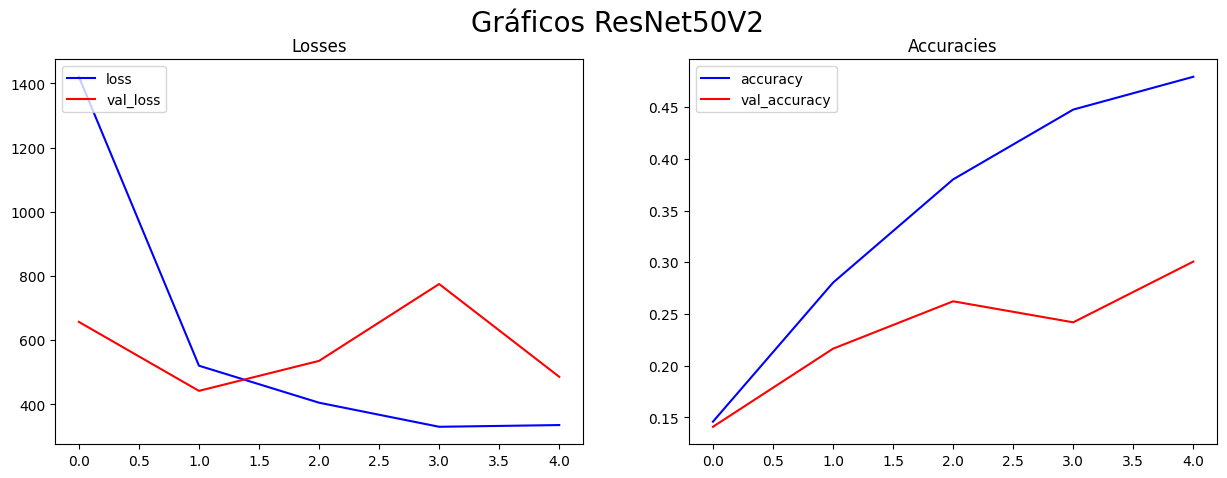

25/25 [==============================] - 3s 95ms/step - loss: 470.5395 - accuracy: 0.3128 - precision_1: 0.3128 - recall_1: 0.3128
***** Test loss: 470.5394592285156 *****
***** Test accuracy: 0.3128238320350647 *****
***** Test Precision: 0.3128238320350647 *****
***** Test Recall: 0.3128238320350647 *****


In [22]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos ResNet50V2', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model2.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

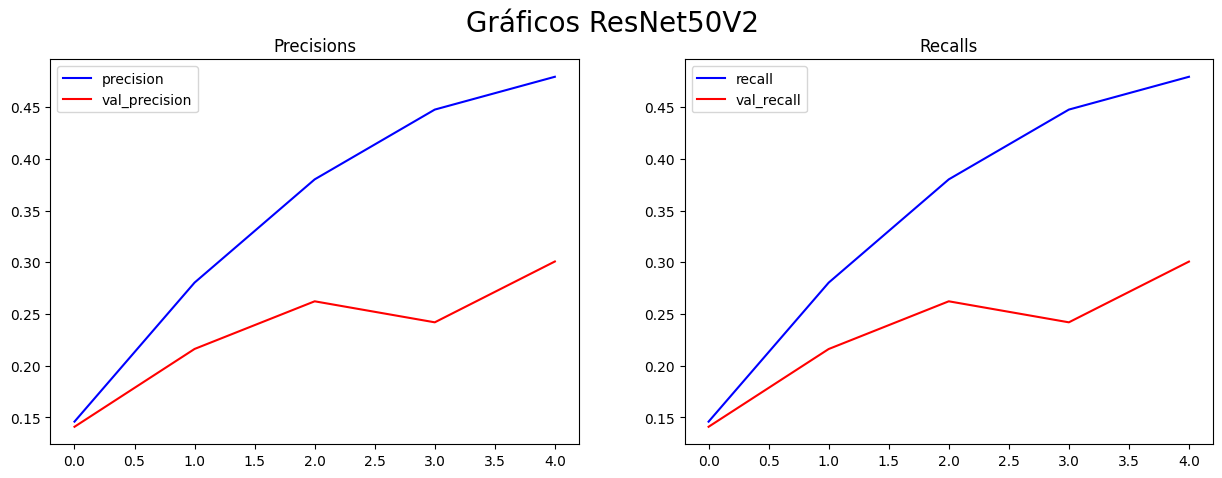

In [24]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision_1'], color='blue', label='precision')
plt.plot(history.history['val_precision_1'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall_1'], color='blue', label='recall')
plt.plot(history.history['val_recall_1'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos ResNet50V2', fontsize=20)
plt.show()

In [51]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    predicciones = model2.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))  

1/1 [==============================] - 0s 432ms/step


In [52]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.46363331155661264,
 'recall': 0.3128238341968912,
 'f1-score': 0.30431097898280585,
 'support': 1544.0}

# ---> **MODELO3 DenseNet201** <---

In [53]:
from keras.applications import DenseNet201

dimensionesModelo3 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo3)

dimension_foto = dimensionesModelo3[0]

model3 = Sequential()
model3.add(Input(shape=(dimension_foto, dimension_foto, 3)))
denseNet201 = DenseNet201(weights='imagenet', include_top=False)
denseNet201.trainable=False
model3.add(denseNet201)

model3.add(Flatten())
model3.add(Dense(num_classes, activation='softmax'))

model3.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model3.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 flatten_2 (Flatten)         (None, 94080)             0         
                                                                 
 dense_2 (Dense)             (None, 31)                2916511   
                                                                 
Total params: 21,238,495
Trainable params: 2,916,511
Non-trainable params: 18,321,984
_________________________________________________________________


In [54]:
model3.compile(
  optimizer=Adam(),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy', Precision(), Recall()]
)

inicio = time.time()

history = model3.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=1,
                    shuffle=True,
) 

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/5
171/171 [==============================] - 42s 200ms/step - loss: 37.2617 - accuracy: 0.2346 - precision_2: 0.2364 - recall_2: 0.2335 - val_loss: 25.3813 - val_accuracy: 0.3013 - val_precision_2: 0.3025 - val_recall_2: 0.3003
Epoch 2/5
171/171 [==============================] - 30s 171ms/step - loss: 15.6365 - accuracy: 0.4753 - precision_2: 0.4771 - recall_2: 0.4743 - val_loss: 24.2394 - val_accuracy: 0.3645 - val_precision_2: 0.3658 - val_recall_2: 0.3642
Epoch 3/5
171/171 [==============================] - 30s 174ms/step - loss: 9.6396 - accuracy: 0.6252 - precision_2: 0.6260 - recall_2: 0.6245 - val_loss: 21.3716 - val_accuracy: 0.4319 - val_precision_2: 0.4335 - val_recall_2: 0.4303
Epoch 4/5
171/171 [==============================] - 31s 178ms/step - loss: 7.2071 - accuracy: 0.7036 - precision_2: 0.7052 - recall_2: 0.7030 - val_loss: 26.4585 - val_accuracy: 0.4110 - val_precision_2: 0.4128 - val_recall_2: 0.4106
Epoch 5/5
171/171 [==============================] - 29s 1

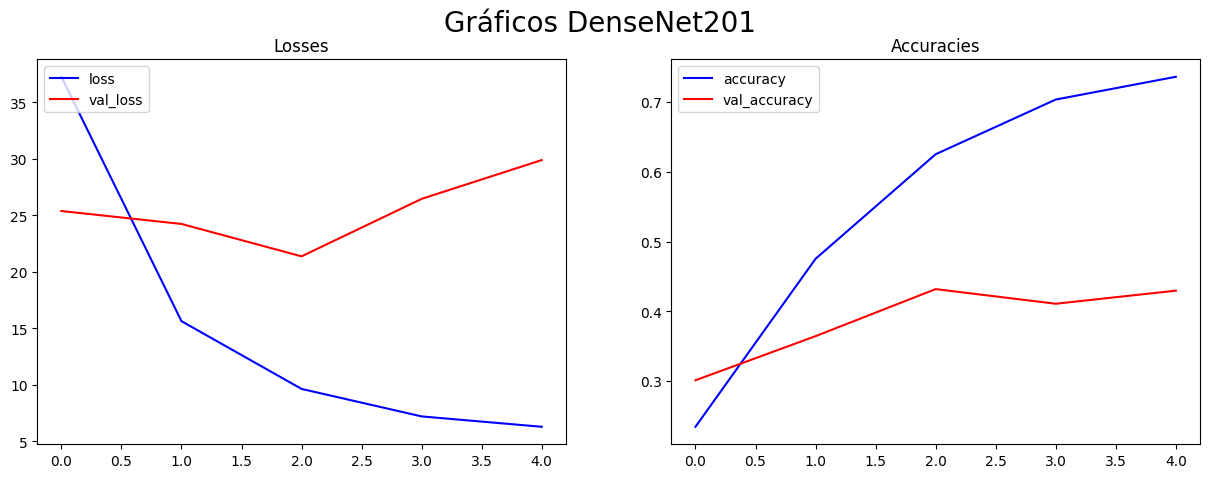

25/25 [==============================] - 5s 175ms/step - loss: 31.4720 - accuracy: 0.4165 - precision_2: 0.4173 - recall_2: 0.4165
***** Test loss: 31.471996307373047 *****
***** Test accuracy: 0.41645076870918274 *****
***** Test Precision: 0.4172615110874176 *****
***** Test Recall: 0.41645076870918274 *****


In [55]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos DenseNet201', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model3.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

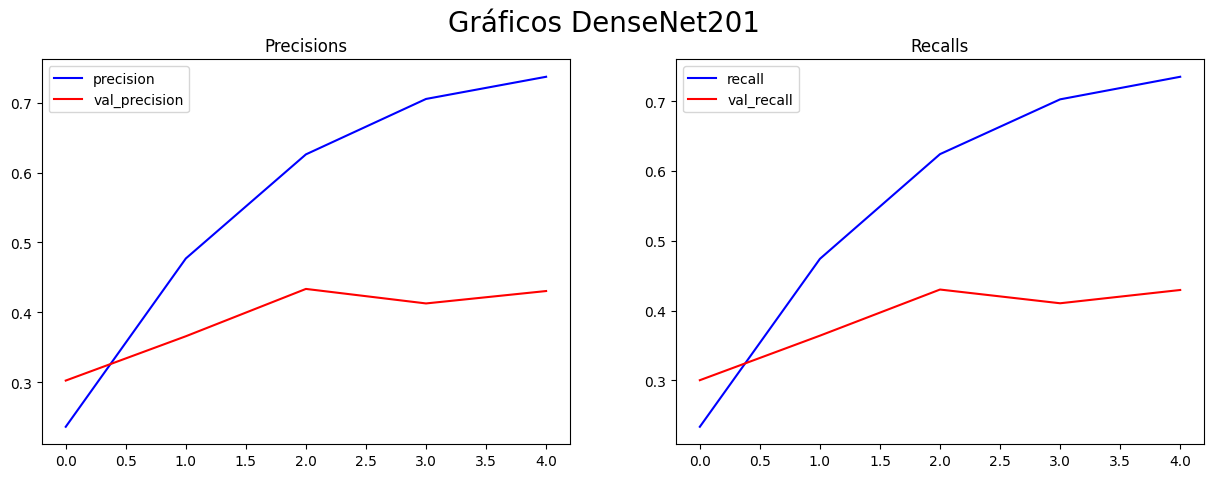

In [56]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision_2'], color='blue', label='precision')
plt.plot(history.history['val_precision_2'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall_2'], color='blue', label='recall')
plt.plot(history.history['val_recall_2'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos DenseNet201', fontsize=20)
plt.show()

In [57]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    predicciones = model3.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))  

1/1 [==============================] - 2s 2s/step


In [58]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.5124298278040079,
 'recall': 0.4164507772020725,
 'f1-score': 0.3979196472687764,
 'support': 1544.0}

# ---> **MODELO5 MobileNetV2** <---

In [60]:
from keras.applications import MobileNetV2

dimensionesModelo5 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo5)

dimension_foto = dimensionesModelo5[0]

model5 = Sequential()
model5.add(Input(shape=(dimension_foto, dimension_foto, 3)))
mobileNetV2 = MobileNetV2(weights='imagenet', include_top=False)
mobileNetV2.trainable=False
model5.add(mobileNetV2)

model5.add(Flatten())
model5.add(Dense(num_classes, activation='softmax'))

model5.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model5.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 31)                1944351   
                                                                 
Total params: 4,202,335
Trainable params: 1,944,351
Non-trainable params: 2,257,984
_________________________________________________________________


In [61]:
model5.compile(
  optimizer=Adam(),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy', Precision(), Recall()]
)

inicio = time.time()

history = model5.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=1,
                    shuffle=True,
) 

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/5
171/171 [==============================] - 18s 89ms/step - loss: 9.6416 - accuracy: 0.2065 - precision_3: 0.2193 - recall_3: 0.1929 - val_loss: 8.4088 - val_accuracy: 0.2461 - val_precision_3: 0.2576 - val_recall_3: 0.2384
Epoch 2/5
171/171 [==============================] - 15s 84ms/step - loss: 2.7044 - accuracy: 0.5789 - precision_3: 0.6076 - recall_3: 0.5661 - val_loss: 7.7964 - val_accuracy: 0.2832 - val_precision_3: 0.2966 - val_recall_3: 0.2735
Epoch 3/5
171/171 [==============================] - 15s 84ms/step - loss: 1.4660 - accuracy: 0.7296 - precision_3: 0.7483 - recall_3: 0.7192 - val_loss: 7.3199 - val_accuracy: 0.3181 - val_precision_3: 0.3314 - val_recall_3: 0.3100
Epoch 4/5
171/171 [==============================] - 15s 85ms/step - loss: 0.9845 - accuracy: 0.8126 - precision_3: 0.8250 - recall_3: 0.8049 - val_loss: 7.7024 - val_accuracy: 0.3255 - val_precision_3: 0.3370 - val_recall_3: 0.3171
Epoch 5/5
171/171 [==============================] - 15s 85ms/step -

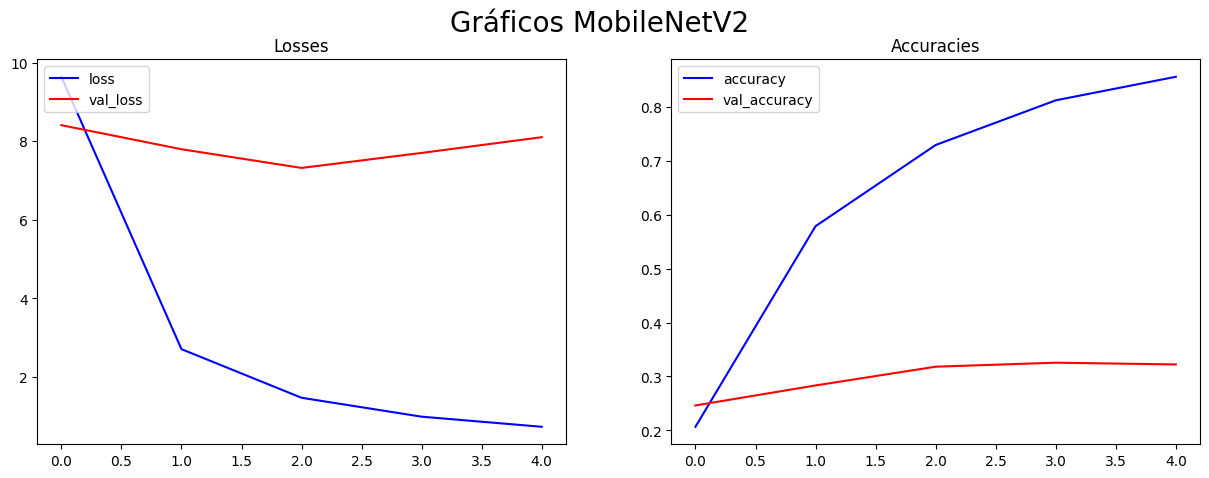

25/25 [==============================] - 2s 61ms/step - loss: 7.7581 - accuracy: 0.3452 - precision_3: 0.3549 - recall_3: 0.3381
***** Test loss: 7.758100509643555 *****
***** Test accuracy: 0.34520724415779114 *****
***** Test Precision: 0.3548606336116791 *****
***** Test Recall: 0.3380829095840454 *****


In [62]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos MobileNetV2', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model5.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

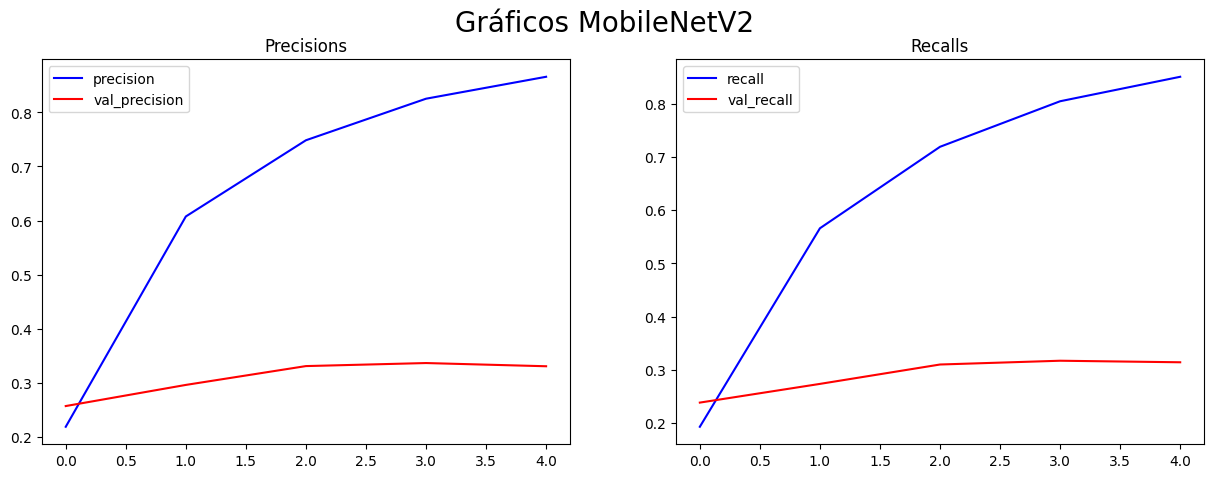

In [64]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision_3'], color='blue', label='precision')
plt.plot(history.history['val_precision_3'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall_3'], color='blue', label='recall')
plt.plot(history.history['val_recall_3'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos MobileNetV2', fontsize=20)
plt.show()

In [69]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    predicciones = model5.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))  

1/1 [==============================] - 0s 397ms/step


In [70]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.44309668796191504,
 'recall': 0.34520725388601037,
 'f1-score': 0.3485855829479839,
 'support': 1544.0}

# ---> **MODELO7 VGG19** <---

In [67]:
from keras.applications import VGG19

dimensionesModelo7 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo7)

dimension_foto = dimensionesModelo7[0]

model7 = Sequential()
model7.add(Input(shape=(dimension_foto, dimension_foto, 3)))
vgg19 = VGG19(weights='imagenet', include_top=False)
vgg19.trainable=False
model7.add(vgg19)

model7.add(Flatten())
model7.add(Dense(num_classes, activation='softmax'))

model7.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model7.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 31)                777759    
                                                                 
Total params: 20,802,143
Trainable params: 777,759
Non-trainable params: 20,024,384
_________________________________________________________________


In [68]:
model7.compile(
  optimizer=Adam(),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy', Precision(), Recall()]
)

inicio = time.time()

history = model7.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=1,
                    shuffle=True,
) 

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/5
171/171 [==============================] - 39s 212ms/step - loss: 18.4046 - accuracy: 0.5365 - precision_4: 0.5370 - recall_4: 0.5362 - val_loss: 14.3811 - val_accuracy: 0.6439 - val_precision_4: 0.6439 - val_recall_4: 0.6439
Epoch 2/5
171/171 [==============================] - 35s 201ms/step - loss: 3.5537 - accuracy: 0.8790 - precision_4: 0.8792 - recall_4: 0.8789 - val_loss: 15.4089 - val_accuracy: 0.6884 - val_precision_4: 0.6884 - val_recall_4: 0.6877
Epoch 3/5
171/171 [==============================] - 35s 201ms/step - loss: 1.6983 - accuracy: 0.9304 - precision_4: 0.9304 - recall_4: 0.9304 - val_loss: 18.3802 - val_accuracy: 0.6887 - val_precision_4: 0.6887 - val_recall_4: 0.6887
Epoch 4/5
171/171 [==============================] - 33s 187ms/step - loss: 1.3003 - accuracy: 0.9483 - precision_4: 0.9485 - recall_4: 0.9483 - val_loss: 18.9124 - val_accuracy: 0.6823 - val_precision_4: 0.6827 - val_recall_4: 0.6823
Epoch 5/5
171/171 [==============================] - 31s 18

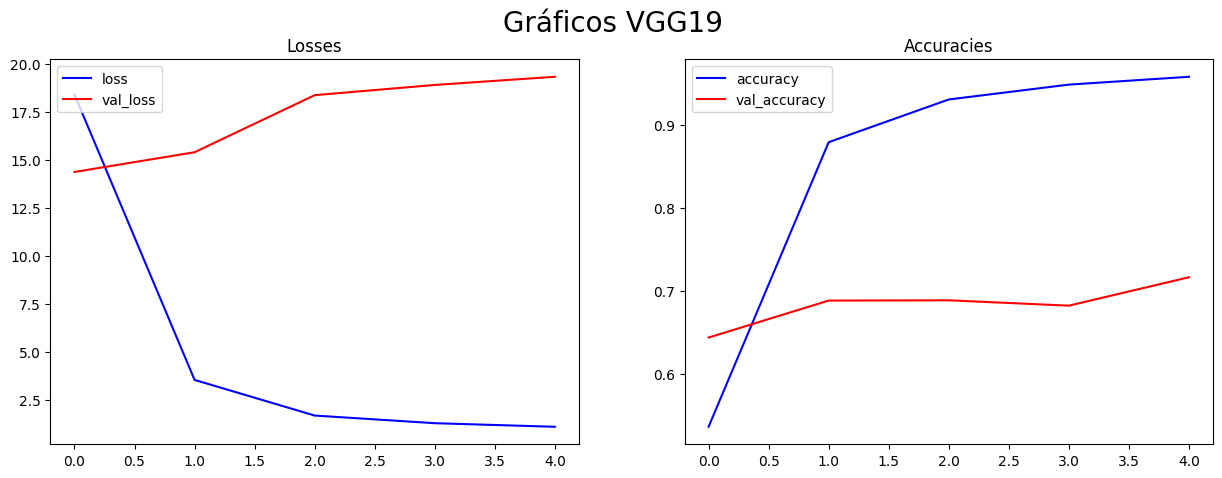

25/25 [==============================] - 5s 166ms/step - loss: 20.1268 - accuracy: 0.7111 - precision_4: 0.7116 - recall_4: 0.7111
***** Test loss: 20.12677764892578 *****
***** Test accuracy: 0.7111399173736572 *****
***** Test Precision: 0.7116007804870605 *****
***** Test Recall: 0.7111399173736572 *****


In [71]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos VGG19', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model7.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

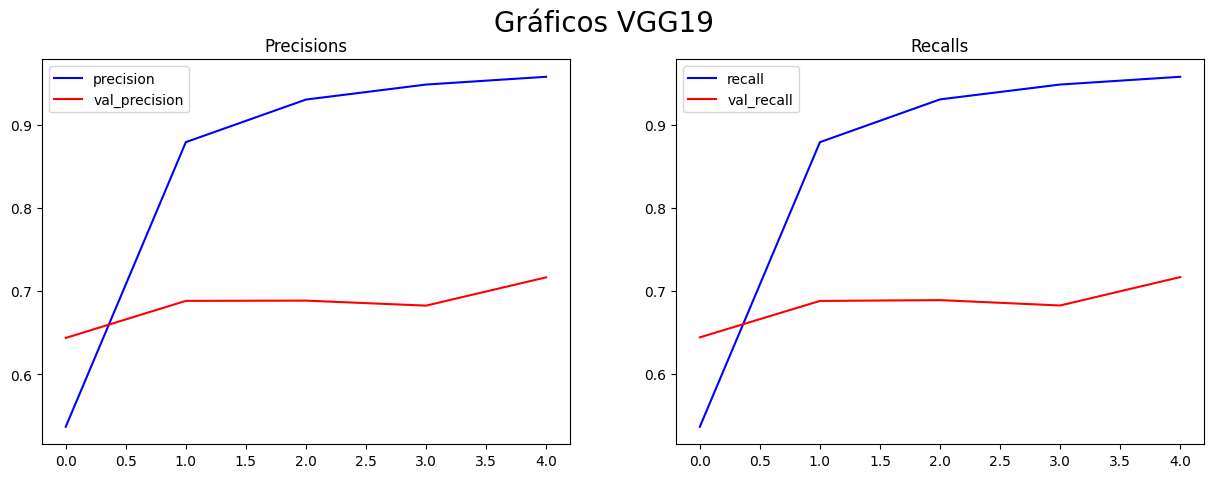

In [72]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision_4'], color='blue', label='precision')
plt.plot(history.history['val_precision_4'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall_4'], color='blue', label='recall')
plt.plot(history.history['val_recall_4'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos VGG19', fontsize=20)
plt.show()

In [73]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    predicciones = model7.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))  

1/1 [==============================] - 0s 85ms/step


In [74]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.7358186304221914,
 'recall': 0.711139896373057,
 'f1-score': 0.704374040236711,
 'support': 1544.0}

# ---> **MODELO8 EfficientNetB0** <---

In [75]:
from keras.applications import EfficientNetB0

dimensionesModelo8 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo8)

dimension_foto = dimensionesModelo8[0]

model8 = Sequential()
model8.add(Input(shape=(dimension_foto, dimension_foto, 3)))
efficienciaB0 = EfficientNetB0(weights='imagenet', include_top=False)
efficienciaB0.trainable=False
model8.add(efficienciaB0)

model8.add(Flatten())
model8.add(Dense(num_classes, activation='softmax'))

model8.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model8.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 31)                1944351   
                                                                 
Total params: 5,993,922
Trainable params: 1,944,351
Non-trainable params: 4,049,571
_________________________________________________________________


In [76]:
model8.compile(
  optimizer=Adam(),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy', Precision(), Recall()]
)

inicio = time.time()

history = model8.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=1,
                    shuffle=True,
) 

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/5
171/171 [==============================] - 22s 103ms/step - loss: 2.4156 - accuracy: 0.6963 - precision_5: 0.7131 - recall_5: 0.6902 - val_loss: 1.7617 - val_accuracy: 0.8029 - val_precision_5: 0.8063 - val_recall_5: 0.8016
Epoch 2/5
171/171 [==============================] - 17s 95ms/step - loss: 0.4818 - accuracy: 0.9267 - precision_5: 0.9280 - recall_5: 0.9258 - val_loss: 1.9267 - val_accuracy: 0.8129 - val_precision_5: 0.8147 - val_recall_5: 0.8129
Epoch 3/5
171/171 [==============================] - 17s 96ms/step - loss: 0.3031 - accuracy: 0.9511 - precision_5: 0.9515 - recall_5: 0.9508 - val_loss: 2.2460 - val_accuracy: 0.8135 - val_precision_5: 0.8154 - val_recall_5: 0.8135
Epoch 4/5
171/171 [==============================] - 17s 95ms/step - loss: 0.2451 - accuracy: 0.9621 - precision_5: 0.9627 - recall_5: 0.9618 - val_loss: 2.2393 - val_accuracy: 0.8284 - val_precision_5: 0.8292 - val_recall_5: 0.8268
Epoch 5/5
171/171 [==============================] - 17s 94ms/step 

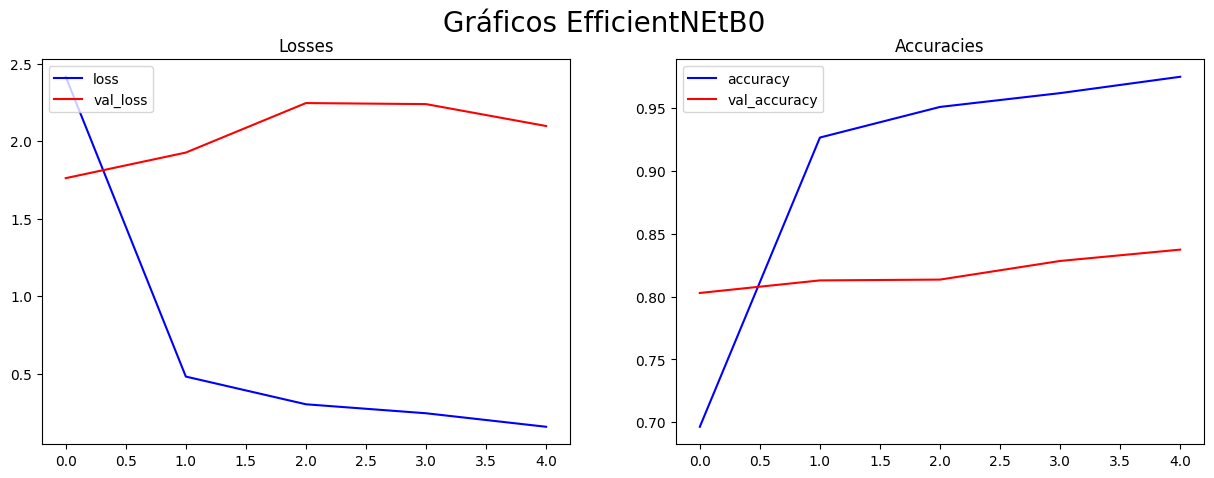

25/25 [==============================] - 3s 82ms/step - loss: 2.2292 - accuracy: 0.8258 - precision_5: 0.8272 - recall_5: 0.8245
***** Test loss: 2.2291572093963623 *****
***** Test accuracy: 0.8257771730422974 *****
***** Test Precision: 0.8271604776382446 *****
***** Test Recall: 0.8244818449020386 *****


In [77]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos EfficientNEtB0', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model8.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

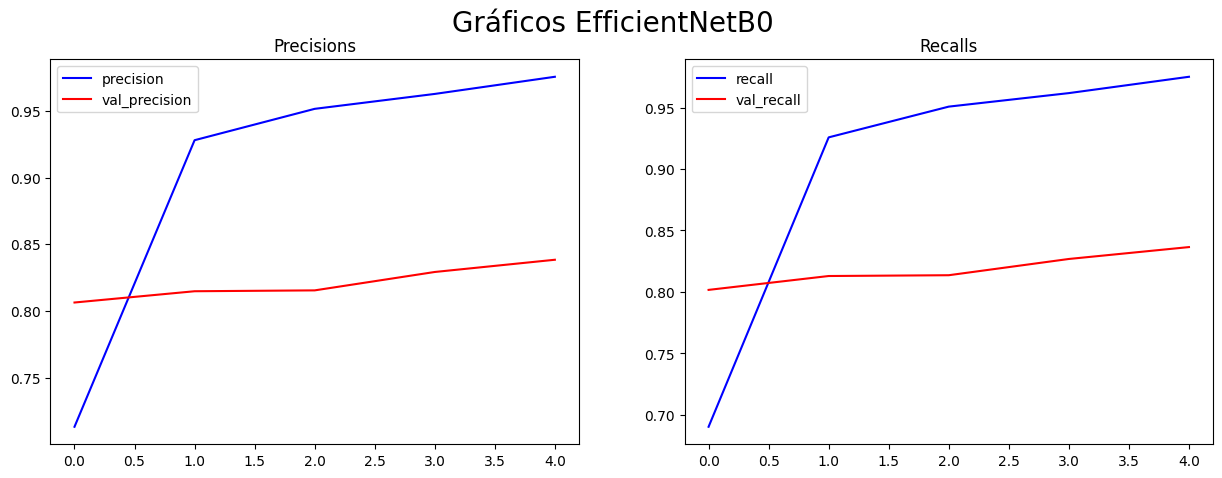

In [78]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision_5'], color='blue', label='precision')
plt.plot(history.history['val_precision_5'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall_5'], color='blue', label='recall')
plt.plot(history.history['val_recall_5'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos EfficientNetB0', fontsize=20)
plt.show()

In [79]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    predicciones = model8.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))  

1/1 [==============================] - 1s 783ms/step


In [80]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.8371991482310774,
 'recall': 0.8257772020725389,
 'f1-score': 0.8245781778345509,
 'support': 1544.0}

# VGG19 10 EPOCHS SGD

In [82]:
from keras.applications import VGG19

dimensionesModelo7 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo7)

dimension_foto = dimensionesModelo7[0]

model7 = Sequential()
model7.add(Input(shape=(dimension_foto, dimension_foto, 3)))
vgg19 = VGG19(weights='imagenet', include_top=False)
vgg19.trainable=False
model7.add(vgg19)

model7.add(Flatten())
model7.add(Dense(num_classes, activation='softmax'))

model7.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model7.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 31)                777759    
                                                                 
Total params: 20,802,143
Trainable params: 777,759
Non-trainable params: 20,024,384
_________________________________________________________________


In [83]:
from keras.optimizers import SGD
model7.compile(
  optimizer=SGD(),
  loss=CategoricalCrossentropy(),
  metrics=['accuracy', Precision(), Recall()]
)

inicio = time.time()

history = model7.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10,
                    verbose=1,
                    shuffle=True,
) 

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/10
171/171 [==============================] - 35s 200ms/step - loss: 312.0656 - accuracy: 0.4820 - precision_6: 0.4821 - recall_6: 0.4820 - val_loss: 159.9462 - val_accuracy: 0.5961 - val_precision_6: 0.5961 - val_recall_6: 0.5961
Epoch 2/10
171/171 [==============================] - 35s 198ms/step - loss: 43.6455 - accuracy: 0.8082 - precision_6: 0.8082 - recall_6: 0.8082 - val_loss: 93.0948 - val_accuracy: 0.6852 - val_precision_6: 0.6852 - val_recall_6: 0.6852
Epoch 3/10
171/171 [==============================] - 35s 202ms/step - loss: 17.1276 - accuracy: 0.8940 - precision_6: 0.8940 - recall_6: 0.8940 - val_loss: 81.2772 - val_accuracy: 0.7084 - val_precision_6: 0.7084 - val_recall_6: 0.7084
Epoch 4/10
171/171 [==============================] - 34s 197ms/step - loss: 6.4456 - accuracy: 0.9472 - precision_6: 0.9472 - recall_6: 0.9472 - val_loss: 74.6120 - val_accuracy: 0.7248 - val_precision_6: 0.7248 - val_recall_6: 0.7248
Epoch 5/10
171/171 [==============================]

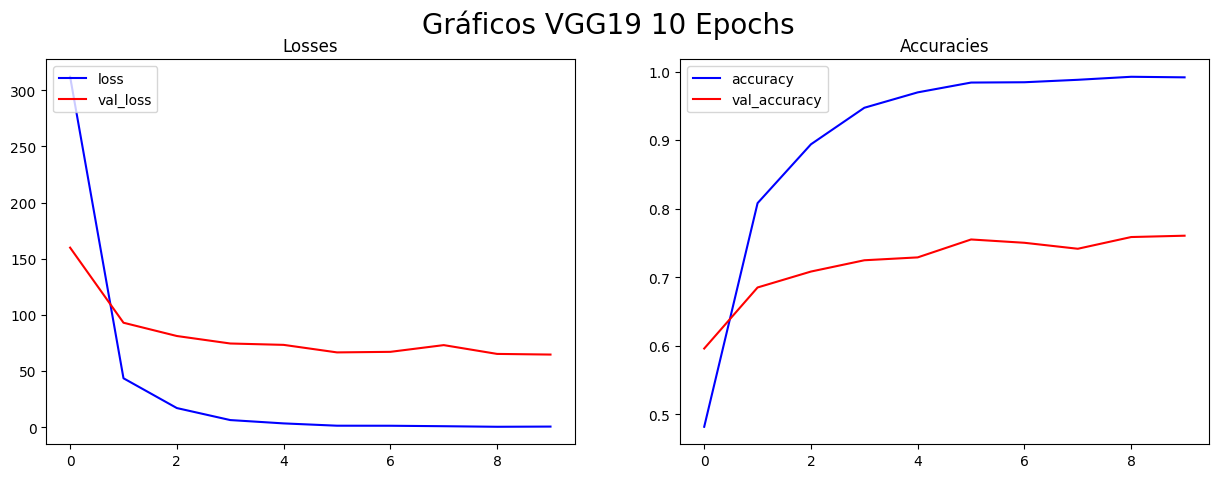

25/25 [==============================] - 4s 146ms/step - loss: 63.1231 - accuracy: 0.7655 - precision_6: 0.7655 - recall_6: 0.7655
***** Test loss: 63.12314987182617 *****
***** Test accuracy: 0.765544056892395 *****
***** Test Precision: 0.765544056892395 *****
***** Test Recall: 0.765544056892395 *****


In [84]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos VGG19 10 Epochs', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model7.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

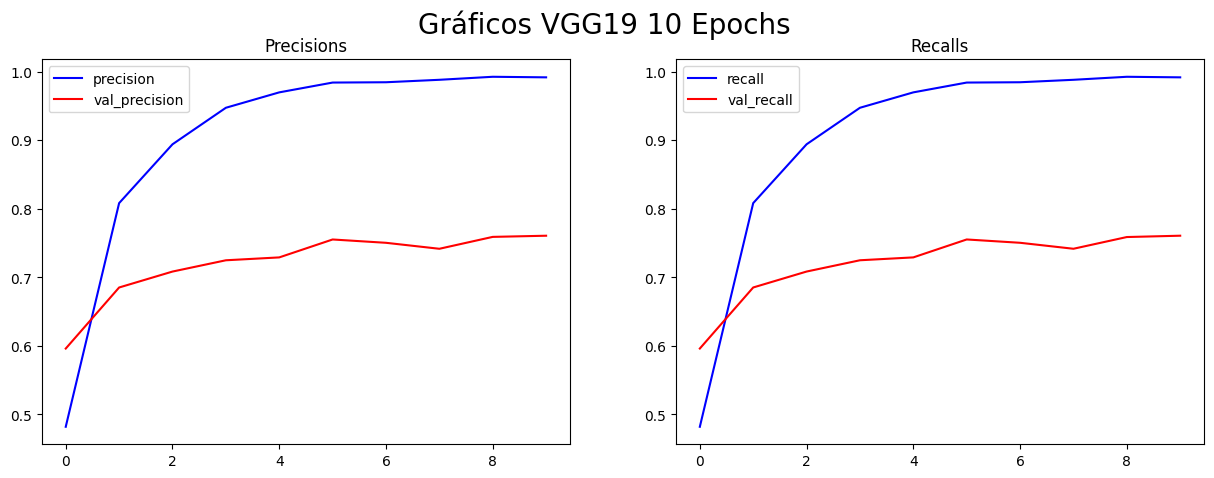

In [85]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision_6'], color='blue', label='precision')
plt.plot(history.history['val_precision_6'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall_6'], color='blue', label='recall')
plt.plot(history.history['val_recall_6'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos VGG19 10 Epochs', fontsize=20)
plt.show()

In [86]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    predicciones = model7.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))  

1/1 [==============================] - 0s 83ms/step


In [87]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.766197963927405,
 'recall': 0.7655440414507773,
 'f1-score': 0.7613335473522068,
 'support': 1544.0}